In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy
import scipy.stats as stats
import pylab

In [2]:
df = pd.read_csv(r"content.csv")

In [3]:
df

,content_id,content_type,language,genre,duration,release_date,rating,episode_count,season_count
0,cont_475_19_32,series,english,drama,4980000,2018-07-01,10,32,19
1,cont_2185_15_21,series,english,drama,3000000,2016-03-29,4,21,15
2,cont_4857_13_28,series,tamil,comedy,3120000,2006-03-06,8,28,13
3,cont_3340_1_5,sports,hindi,cricket,9900000,2009-01-10,0,5,1
4,cont_1664_10_29,series,hindi,action,3660000,2020-05-25,2,29,10
...,...,...,...,...,...,...,...,...,...
48640,cont_4218_6_15,series,hindi,drama,3360000,2015-02-04,6,15,6
48641,cont_2533_1_14,series,marathi,sci-fi,3120000,2002-01-15,4,14,1
48642,cont_4606_33_5,series,hindi,drama,3180000,2006-02-18,6,5,33
48643,cont_3708_9_1,series,english,drama,4020000,2010-04-12,5,1,9


In [4]:
df.dtypes


content_id       object
content_type     object
language         object
genre            object
duration          int64
release_date     object
rating            int64
episode_count     int64
season_count      int64
dtype: object

In [5]:
df.describe

<bound method NDFrame.describe of             content_id content_type language    genre  duration release_date  \
0       cont_475_19_32       series  english    drama   4980000   2018-07-01   
1      cont_2185_15_21       series  english    drama   3000000   2016-03-29   
2      cont_4857_13_28       series    tamil   comedy   3120000   2006-03-06   
3        cont_3340_1_5       sports    hindi  cricket   9900000   2009-01-10   
4      cont_1664_10_29       series    hindi   action   3660000   2020-05-25   
...                ...          ...      ...      ...       ...          ...   
48640   cont_4218_6_15       series    hindi    drama   3360000   2015-02-04   
48641   cont_2533_1_14       series  marathi   sci-fi   3120000   2002-01-15   
48642   cont_4606_33_5       series    hindi    drama   3180000   2006-02-18   
48643    cont_3708_9_1       series  english    drama   4020000   2010-04-12   
48644    cont_3470_2_4       series  english   horror   2760000   1997-03-26   

     

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48645 entries, 0 to 48644
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content_id     48645 non-null  object
 1   content_type   48645 non-null  object
 2   language       48645 non-null  object
 3   genre          48645 non-null  object
 4   duration       48645 non-null  int64 
 5   release_date   48645 non-null  object
 6   rating         48645 non-null  int64 
 7   episode_count  48645 non-null  int64 
 8   season_count   48645 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.3+ MB


In [7]:
df.drop(["content_id", "release_date"], axis=1, inplace=True)

In [8]:
df

,content_type,language,genre,duration,rating,episode_count,season_count
0,series,english,drama,4980000,10,32,19
1,series,english,drama,3000000,4,21,15
2,series,tamil,comedy,3120000,8,28,13
3,sports,hindi,cricket,9900000,0,5,1
4,series,hindi,action,3660000,2,29,10
...,...,...,...,...,...,...,...
48640,series,hindi,drama,3360000,6,15,6
48641,series,marathi,sci-fi,3120000,4,14,1
48642,series,hindi,drama,3180000,6,5,33
48643,series,english,drama,4020000,5,1,9


In [9]:
df1 = pd.get_dummies(df.content_type)

In [10]:
df1

,movies,series,sports,teasers
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
48640,0,1,0,0
48641,0,1,0,0
48642,0,1,0,0
48643,0,1,0,0


In [11]:
df1.drop(["teasers"], axis=1, inplace=True)

In [12]:
df1.tail()

,movies,series,sports
48640,0,1,0
48641,0,1,0
48642,0,1,0
48643,0,1,0
48644,0,1,0


In [13]:
df2 = pd.get_dummies(df.genre)
df3 = pd.get_dummies(df.language)


In [14]:
df2.drop(["thriller"], axis=1, inplace=True)

In [15]:
df3.drop(["telugu"], axis=1, inplace=True)

In [16]:
df11 = pd.concat([df, df1], axis=1)

In [17]:
df12 = pd.concat([df11, df2], axis=1)

In [18]:
df13 = pd.concat([df12, df3], axis=1)

In [19]:
df13

,content_type,language,genre,duration,rating,episode_count,season_count,movies,series,sports,...,bengali,english,gujarati,hindi,kannada,malayalam,marathi,oriya,punjabi,tamil
0,series,english,drama,4980000,10,32,19,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,series,english,drama,3000000,4,21,15,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,series,tamil,comedy,3120000,8,28,13,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,sports,hindi,cricket,9900000,0,5,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,series,hindi,action,3660000,2,29,10,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48640,series,hindi,drama,3360000,6,15,6,0,1,0,...,0,0,0,1,0,0,0,0,0,0
48641,series,marathi,sci-fi,3120000,4,14,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
48642,series,hindi,drama,3180000,6,5,33,0,1,0,...,0,0,0,1,0,0,0,0,0,0
48643,series,english,drama,4020000,5,1,9,0,1,0,...,0,1,0,0,0,0,0,0,0,0


# EDA

# Histogram

<AxesSubplot:xlabel='duration', ylabel='Count'>

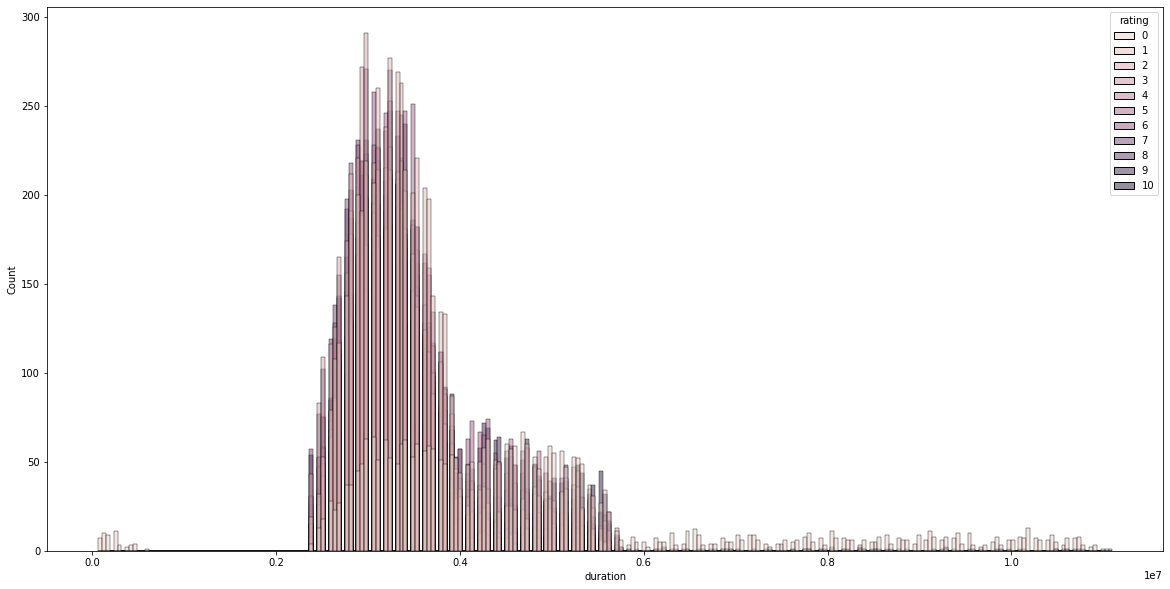

In [20]:
plt.figure(figsize=(20, 10))
sns.histplot(x="duration", data=df13, hue="rating")

<AxesSubplot:xlabel='duration'>

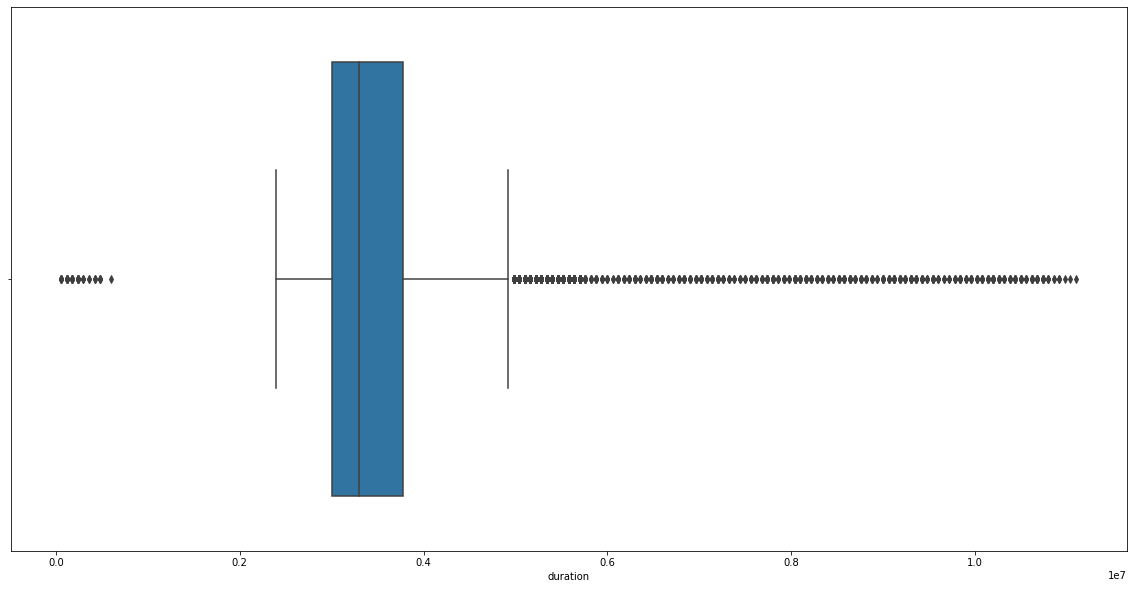

In [21]:
plt.figure(figsize=(15, 10))
sns.boxplot(x="duration", data=df13)

In [22]:
df13.language.value_counts()

hindi        23912
english       9194
telugu        4781
tamil         2577
marathi       2465
malayalam     2415
gujarati      1179
kannada        810
punjabi        474
bengali        454
oriya          384
Name: language, dtype: int64

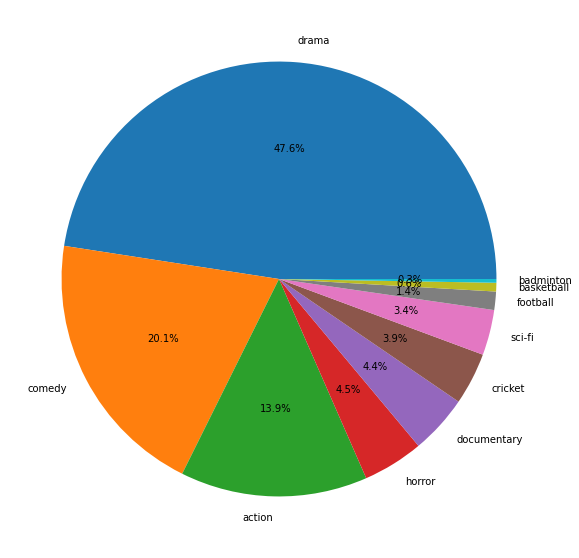

In [23]:
plt.figure(figsize=(20, 10))
plt.pie(df13.genre.value_counts()[:10], labels=df13.genre.value_counts()[:10].keys(), autopct="%.1f%%")
plt.show()

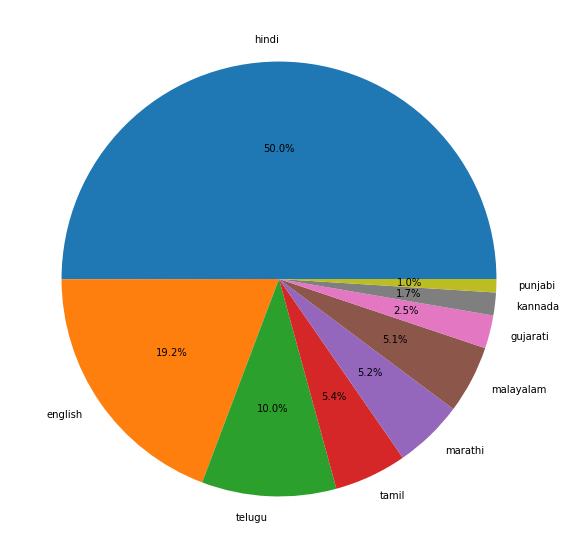

In [24]:
plt.figure(figsize=(20, 10))
plt.pie(df13.language.value_counts()[:9], labels=df13.language.value_counts().keys()[:9], autopct="%.1f%%")
plt.show()

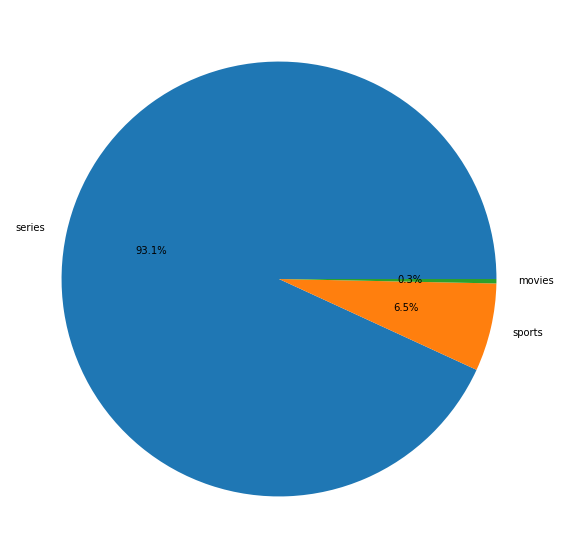

In [25]:
plt.figure(figsize=(20, 10))
plt.pie(df13.content_type.value_counts()[:3], labels=df13.content_type.value_counts()[:3].keys(), autopct="%.1f%%")
plt.show()


<AxesSubplot:xlabel='duration', ylabel='episode_count'>

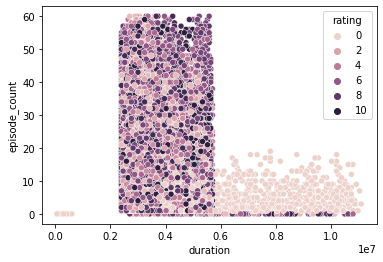

In [26]:
sns.scatterplot(x="duration", y="episode_count", data=df13, hue="rating")

# feature transformation


<AxesSubplot:xlabel='duration', ylabel='Count'>

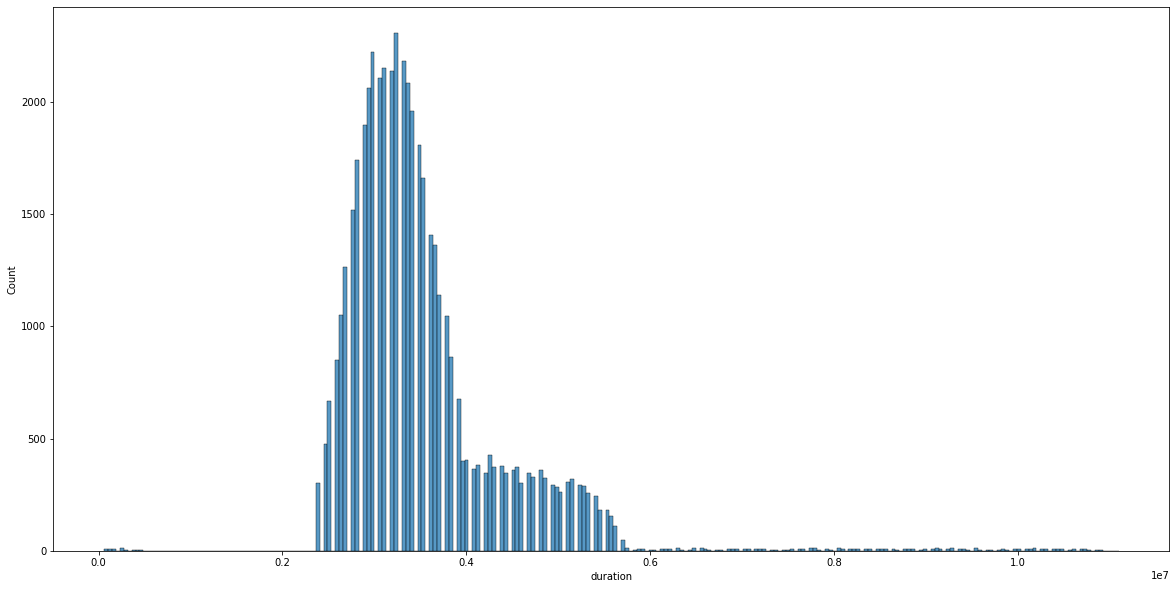

In [27]:
plt.figure(figsize=(20, 10))
sns.histplot(x="duration", data=df13)


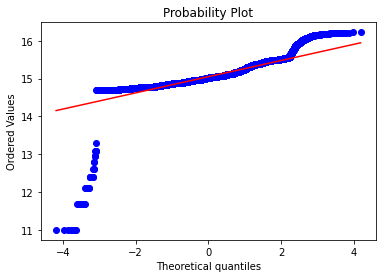

In [28]:
stats.probplot(np.log(df13.duration), dist="norm", plot=pylab)
pylab.show()

<AxesSubplot:xlabel='duration', ylabel='Count'>

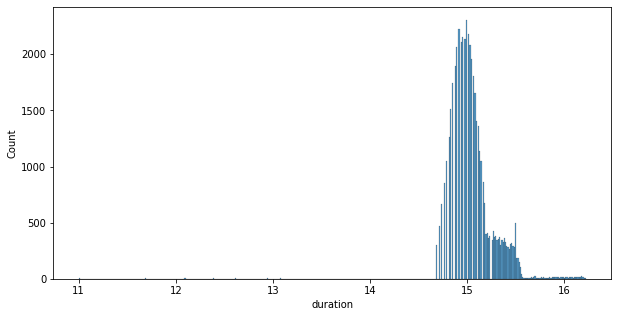

In [29]:
plt.figure(figsize=(10, 5))
sns.histplot(np.log(df13.duration))

In [30]:
df13["normal_duration"] = np.log(df13.duration)
# df13["normal_duration"] = 1/(df13.duration)

In [31]:
df13

,content_type,language,genre,duration,rating,episode_count,season_count,movies,series,sports,...,english,gujarati,hindi,kannada,malayalam,marathi,oriya,punjabi,tamil,normal_duration
0,series,english,drama,4980000,10,32,19,0,1,0,...,1,0,0,0,0,0,0,0,0,15.420940
1,series,english,drama,3000000,4,21,15,0,1,0,...,1,0,0,0,0,0,0,0,0,14.914123
2,series,tamil,comedy,3120000,8,28,13,0,1,0,...,0,0,0,0,0,0,0,0,1,14.953344
3,sports,hindi,cricket,9900000,0,5,1,0,0,1,...,0,0,1,0,0,0,0,0,0,16.108045
4,series,hindi,action,3660000,2,29,10,0,1,0,...,0,0,1,0,0,0,0,0,0,15.112974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48640,series,hindi,drama,3360000,6,15,6,0,1,0,...,0,0,1,0,0,0,0,0,0,15.027452
48641,series,marathi,sci-fi,3120000,4,14,1,0,1,0,...,0,0,0,0,0,1,0,0,0,14.953344
48642,series,hindi,drama,3180000,6,5,33,0,1,0,...,0,0,1,0,0,0,0,0,0,14.972392
48643,series,english,drama,4020000,5,1,9,0,1,0,...,1,0,0,0,0,0,0,0,0,15.206792


In [32]:
droplist = ["content_type", "language", "genre", "duration"]


In [33]:
df13.drop(droplist, axis=1, inplace=True)

In [34]:
df13

,rating,episode_count,season_count,movies,series,sports,action,adventure,animation,badminton,...,english,gujarati,hindi,kannada,malayalam,marathi,oriya,punjabi,tamil,normal_duration
0,10,32,19,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,15.420940
1,4,21,15,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,14.914123
2,8,28,13,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,14.953344
3,0,5,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,16.108045
4,2,29,10,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,15.112974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48640,6,15,6,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,15.027452
48641,4,14,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,14.953344
48642,6,5,33,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,14.972392
48643,5,1,9,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,15.206792


# Outlier dect

using z score

In [35]:
z = np.abs(df13.normal_duration-df13.normal_duration.mean()) / \
    df13.normal_duration.std()

In [36]:
df13["ob"] = z[z > 3]
#ob is set of outlier

In [37]:
df13

,rating,episode_count,season_count,movies,series,sports,action,adventure,animation,badminton,...,gujarati,hindi,kannada,malayalam,marathi,oriya,punjabi,tamil,normal_duration,ob
0,10,32,19,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15.420940,NaN
1,4,21,15,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,14.914123,NaN
2,8,28,13,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,14.953344,NaN
3,0,5,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,16.108045,4.526122
4,2,29,10,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,15.112974,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48640,6,15,6,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,15.027452,NaN
48641,4,14,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,14.953344,NaN
48642,6,5,33,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,14.972392,NaN
48643,5,1,9,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15.206792,NaN


In [38]:
a = []
for i in range(0, len(df13["ob"])):
    if df13["ob"][i] > 3:
        a.append(i)

In [39]:
df13.drop(a, inplace=True)
#outlier removed

<AxesSubplot:xlabel='normal_duration', ylabel='Count'>

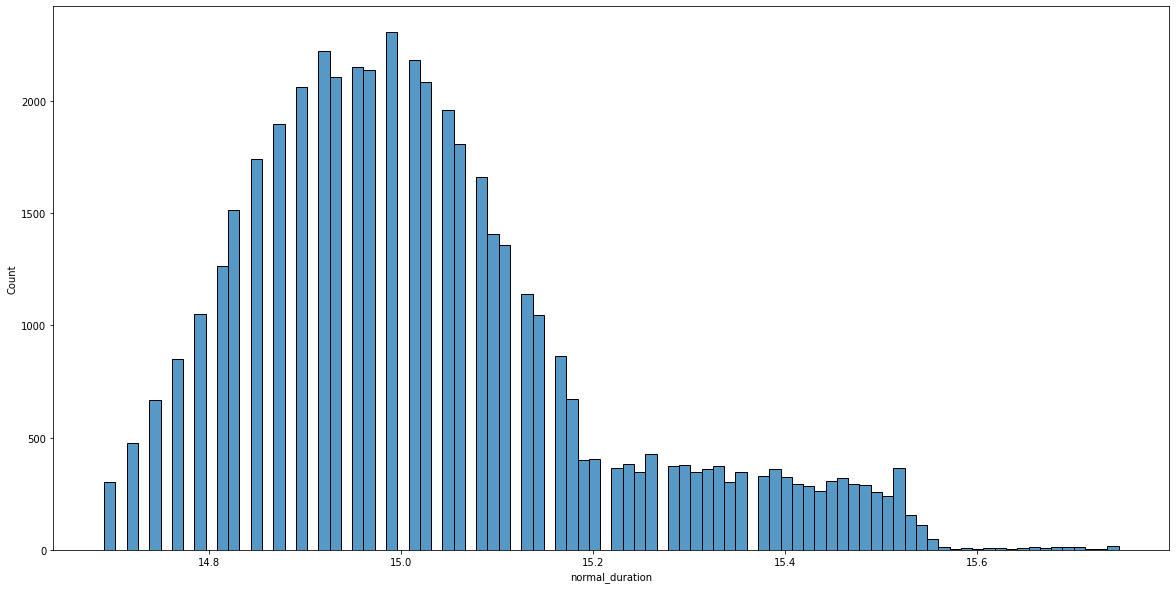

In [40]:
plt.figure(figsize=(20, 10))
sns.histplot(df13.normal_duration)

In [41]:
df13.drop(["ob"], axis="columns", inplace=True)

In [42]:
df13

,rating,episode_count,season_count,movies,series,sports,action,adventure,animation,badminton,...,english,gujarati,hindi,kannada,malayalam,marathi,oriya,punjabi,tamil,normal_duration
0,10,32,19,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,15.420940
1,4,21,15,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,14.914123
2,8,28,13,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,14.953344
4,2,29,10,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,15.112974
5,10,37,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,14.933925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48640,6,15,6,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,15.027452
48641,4,14,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,14.953344
48642,6,5,33,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,14.972392
48643,5,1,9,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,15.206792


# Kmeans clustering

In [43]:
from sklearn.cluster import KMeans

In [44]:
x = df13

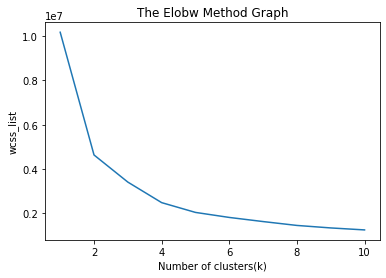

In [45]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [46]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(x)

In [47]:
kmeans.cluster_centers_

array([[ 5.22073237e+00,  2.15353934e+01,  5.79703240e+00,
        -2.68882139e-17,  9.91015519e-01,  8.98448135e-03,
         1.51102641e-01, -2.34458720e-18,  2.81892565e-18,
         3.40321263e-04,  3.40321263e-04, -2.41234983e-18,
         2.09501770e-01,  5.37707596e-03, -4.82469967e-18,
         4.71004628e-02,  5.05513204e-01, -4.68917440e-18,
        -4.82469967e-18,  2.17805608e-03,  2.04192758e-04,
         4.67601416e-02, -1.17229360e-18, -1.17229360e-18,
         3.10372992e-02, -1.17229360e-18,  5.44514021e-04,
         7.75932480e-03,  1.76150286e-01,  2.75660223e-02,
         4.94690988e-01,  1.64034849e-02,  4.87340049e-02,
         4.36291860e-02,  7.14674653e-03,  8.23577457e-03,
         6.03729921e-02,  1.50341519e+01],
       [ 4.70429477e+00,  6.58023938e+00,  4.60023469e+00,
         4.55292185e-03,  8.72330439e-01,  1.23116639e-01,
         1.14527106e-01,  1.87749355e-04,  3.28561371e-04,
         4.55292185e-03,  1.19220840e-02,  1.40812016e-04,
         1.89

In [48]:
df13["cluster"] = kmeans.predict(x)

In [49]:
x = kmeans.cluster_centers_[:, 1]

In [50]:
y = kmeans.cluster_centers_[:, 2]

Text(0, 0.5, 'season_count')

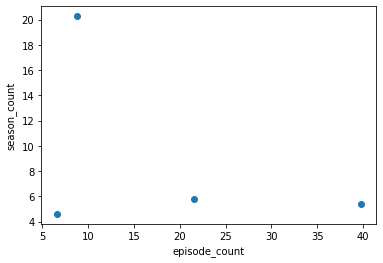

In [51]:
plt.scatter(x, y)
plt.xlabel("episode_count")
plt.ylabel("season_count")

In [52]:
df1 = pd.read_csv(r"content.csv")

In [53]:
df1

,content_id,content_type,language,genre,duration,release_date,rating,episode_count,season_count
0,cont_475_19_32,series,english,drama,4980000,2018-07-01,10,32,19
1,cont_2185_15_21,series,english,drama,3000000,2016-03-29,4,21,15
2,cont_4857_13_28,series,tamil,comedy,3120000,2006-03-06,8,28,13
3,cont_3340_1_5,sports,hindi,cricket,9900000,2009-01-10,0,5,1
4,cont_1664_10_29,series,hindi,action,3660000,2020-05-25,2,29,10
...,...,...,...,...,...,...,...,...,...
48640,cont_4218_6_15,series,hindi,drama,3360000,2015-02-04,6,15,6
48641,cont_2533_1_14,series,marathi,sci-fi,3120000,2002-01-15,4,14,1
48642,cont_4606_33_5,series,hindi,drama,3180000,2006-02-18,6,5,33
48643,cont_3708_9_1,series,english,drama,4020000,2010-04-12,5,1,9


# Checking Correlation

In [54]:
df13.corr()

,rating,episode_count,season_count,movies,series,sports,action,adventure,animation,badminton,...,gujarati,hindi,kannada,malayalam,marathi,oriya,punjabi,tamil,normal_duration,cluster
rating,1.000000,0.080658,0.113670,0.005182,0.401427,-0.408996,0.030891,0.006423,0.007513,-0.076492,...,0.043447,0.010255,-0.020218,0.003703,-0.001591,0.036806,0.010736,-0.007585,-0.069210,0.056126
episode_count,0.080658,1.000000,-0.098487,-0.057595,0.212568,-0.204927,0.076420,-0.011684,-0.015458,-0.039331,...,-0.024130,0.027815,0.006065,-0.032441,0.052725,0.015305,0.010415,0.019454,-0.037832,0.032503
season_count,0.113670,-0.098487,1.000000,-0.048768,0.232964,-0.227361,0.024063,-0.009894,-0.013088,-0.042522,...,-0.000656,-0.025685,0.008483,0.058530,-0.002844,-0.014117,0.003006,0.001797,-0.038589,0.497782
movies,0.005182,-0.057595,-0.048768,1.000000,-0.179052,-0.011077,0.000634,0.202873,0.268384,-0.002072,...,0.007898,0.001234,-0.005878,-0.010332,-0.002019,-0.004026,-0.004483,0.001678,0.068853,-0.002352
series,0.401427,0.212568,0.232964,-0.179052,1.000000,-0.981796,0.097489,-0.036325,-0.048055,-0.183619,...,0.036865,-0.010291,0.032828,0.057706,0.056672,0.022486,0.025039,0.057307,-0.238329,0.025658
sports,-0.408996,-0.204927,-0.227361,-0.011077,-0.981796,1.000000,-0.099207,-0.002247,-0.002973,0.187023,...,-0.038993,0.010221,-0.032230,-0.056656,-0.057209,-0.022077,-0.024583,-0.058569,0.228936,-0.025624
action,0.030891,0.076420,0.024063,0.000634,0.097489,-0.099207,1.000000,-0.003670,-0.004856,-0.018554,...,-0.055526,0.007083,0.083152,-0.077699,0.046845,0.051714,-0.016461,0.049707,-0.012892,0.013480
adventure,0.006423,-0.011684,-0.009894,0.202873,-0.036325,-0.002247,-0.003670,1.000000,-0.000110,-0.000420,...,-0.001443,-0.004403,-0.001192,-0.002096,-0.002117,-0.000817,-0.000910,-0.002167,0.018724,-0.000477
animation,0.007513,-0.015458,-0.013088,0.268384,-0.048055,-0.002973,-0.004856,-0.000110,1.000000,-0.000556,...,-0.001909,-0.001517,-0.001578,-0.002773,-0.002800,-0.001081,-0.001203,0.004794,0.017119,-0.000631
badminton,-0.076492,-0.039331,-0.042522,-0.002072,-0.183619,0.187023,-0.018554,-0.000420,-0.000556,1.000000,...,-0.007293,0.012541,-0.006028,-0.010596,-0.010699,-0.004129,-0.004598,-0.010954,0.047451,-0.004847


<AxesSubplot:>

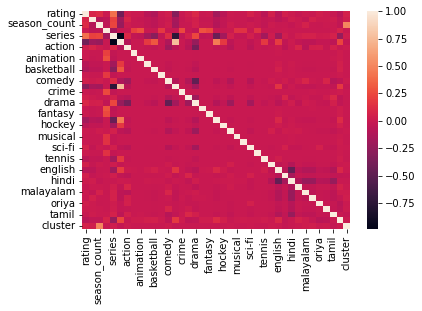

In [55]:
sns.heatmap(df13.corr())

In [56]:
corrMatrix=df13.corr().abs()
upperMatrix = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
corrFutures = [column for column in upperMatrix.columns if any(upperMatrix[column] > 0.95)]

df13.drop(columns=corrFutures)

C:\Users\dell\AppData\Local\Temp\ipykernel_9756\3918593334.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upperMatrix = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))


,rating,episode_count,season_count,movies,series,action,adventure,animation,badminton,basketball,...,gujarati,hindi,kannada,malayalam,marathi,oriya,punjabi,tamil,normal_duration,cluster
0,10,32,19,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15.420940,2
1,4,21,15,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,14.914123,0
2,8,28,13,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,14.953344,0
4,2,29,10,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,15.112974,0
5,10,37,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,14.933925,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48640,6,15,6,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,15.027452,0
48641,4,14,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,14.953344,1
48642,6,5,33,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,14.972392,3
48643,5,1,9,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15.206792,1


# Dropping highly correlated columns

In [57]:
input = df13.drop("cluster", axis=1)
output = df13["cluster"]

# Splitting column

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    input, output, test_size=0.20, random_state=42)

# Model building

In [60]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import cross_val_score

In [61]:
model = CategoricalNB()

In [62]:
model.fit(X_train, y_train)

CategoricalNB()

In [63]:
model.predict(X_test)

array([1, 1, 1, ..., 3, 1, 1])

In [64]:
print(f"train Score:{model.score(X_train,y_train)}")
print(f"test Score:{model.score(X_test,y_test)}")

train Score:0.9797090153286568
test Score:0.9799438844435208
